In [14]:
from pandas import DataFrame
from sklearn import datasets




proc_data, y_true = datasets.make_blobs(
    n_samples=1000,
    n_features=2,
    centers=9,
    cluster_std=1,
    center_box=(-20.0, 20.0),
    shuffle=True,
)

DF = DataFrame(proc_data)
DF["Targets"] = y_true

In [15]:
from sklearn.model_selection import GridSearchCV
from src.Models.K_Means import K_Means


model = K_Means()
search = GridSearchCV(model, {
    "clusters": [3, 5, 9]
})
search.fit(proc_data)
clusters = search.predict(proc_data)
print(search.cv_results_)
DF["Pred"] = clusters

[DEBUG] - n cluster 3 - [0.5003737]
[DEBUG] - n cluster 3 - [0.54782179]
[DEBUG] - n cluster 3 - [0.52727864]
[DEBUG] - n cluster 3 - [0.52892003]
[DEBUG] - n cluster 3 - [0.53470857]
[DEBUG] - n cluster 5 - [0.61829744]
[DEBUG] - n cluster 5 - [0.75918884]
[DEBUG] - n cluster 5 - [0.73542906]
[DEBUG] - n cluster 5 - [0.7388818]
[DEBUG] - n cluster 5 - [0.74934955]
[DEBUG] - n cluster 9 - [0.72577716]
[DEBUG] - n cluster 9 - [0.59895278]
[DEBUG] - n cluster 9 - [0.58780003]
[DEBUG] - n cluster 9 - [0.58638909]


c:\Users\Chris\miniconda3\envs\python-ML-no-gpu\lib\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
1 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Chris\miniconda3\envs\python-ML-no-gpu\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, **fit_params)
  File "a:\vscode\Machine-Learning\From-Scratch\src\Models\K_Means.py", line 36, in fit
    self.centroids[i, : ] = X[random.randint(0, points_number), :]
IndexError: index 800 is out of bounds for axis 0 with size 800

  warnings.warn(some_fits_failed_message, FitFailedWarn

{'mean_fit_time': array([1.8480391 , 2.09191651, 2.03125134]), 'std_fit_time': array([0.03541186, 0.01479016, 1.01567263]), 'mean_score_time': array([0.00199132, 0.00400248, 0.00851951]), 'std_score_time': array([1.87145069e-05, 7.07228962e-04, 4.28557273e-03]), 'param_clusters': masked_array(data=[3, 5, 9],
             mask=[False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'clusters': 3}, {'clusters': 5}, {'clusters': 9}], 'split0_test_score': array([0.5003737 , 0.61829744, 0.72577716]), 'split1_test_score': array([0.54782179, 0.75918884, 0.59895278]), 'split2_test_score': array([0.52727864, 0.73542906,        nan]), 'split3_test_score': array([0.52892003, 0.7388818 , 0.58780003]), 'split4_test_score': array([0.53470857, 0.74934955, 0.58638909]), 'mean_test_score': array([0.52782054, 0.72022934,        nan]), 'std_test_score': array([0.01550694, 0.05164279,        nan]), 'rank_test_score': array([2, 1, 3])}


C:\Users\Chris\AppData\Local\Temp\ipykernel_21492\507838082.py:4: UserWarning: The palette list has more values (20) than needed (5), which may not be intended.
  sns.scatterplot(DF, x=DF[0], y=DF[1], hue="Pred", palette=sns.color_palette("hls", 20))


<Axes: xlabel='0', ylabel='1'>

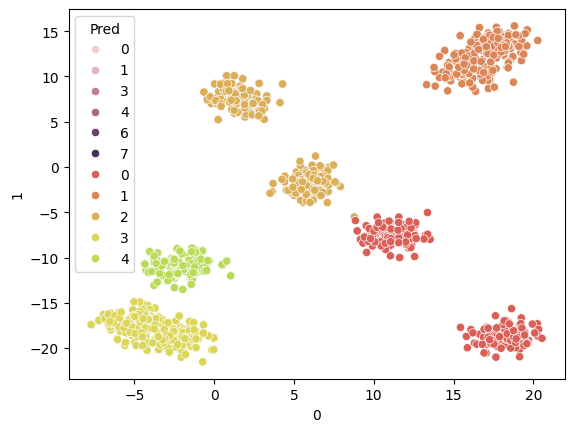

In [17]:
import seaborn as sns

sns.scatterplot(DF, x=DF[0], y=DF[1], hue="Targets")
sns.scatterplot(DF, x=DF[0], y=DF[1], hue="Pred", palette=sns.color_palette("hls", 20))